In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "../Archivos/imdb_top_1000.csv"
df = pd.read_csv(filename,
  usecols=[ "Certificate" , "Genre" , "IMDB_Rating" ])

df.head()

#df.describe()
df.info()
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Certificate  899 non-null    object 
 1   Genre        1000 non-null   object 
 2   IMDB_Rating  1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [2]:
df["Género"] = df[ "Genre" ].str.split( "," , expand=True)[0]
df

,Certificate,Genre,IMDB_Rating,Género
0,A,Drama,9.3,Drama
1,A,"Crime, Drama",9.2,Crime
2,UA,"Action, Crime, Drama",9.0,Action
3,A,"Crime, Drama",9.0,Crime
4,U,"Crime, Drama",9.0,Crime
...,...,...,...,...
995,A,"Comedy, Drama, Romance",7.6,Comedy
996,G,"Drama, Western",7.6,Drama
997,Passed,"Drama, Romance, War",7.6,Drama
998,NaN,"Drama, War",7.6,Drama


In [3]:
df.groupby(["Certificate" , "Género" ])[ "IMDB_Rating" ].mean()

Certificate  Género   
16           Animation    8.100000
A            Action       7.873171
             Adventure    7.912500
             Animation    7.866667
             Biography    8.017647
                            ...   
UA           Crime        7.900000
             Drama        7.953659
             Horror       7.600000
             Mystery      8.250000
Unrated      Comedy       8.100000
Name: IMDB_Rating, Length: 79, dtype: float64

In [4]:
ratings = df.groupby(["Certificate" , "Género" ])[ "IMDB_Rating" ].mean().unstack()
ratings

Género,Animation,Action,Adventure,Biography,Comedy,Crime,Drama,Horror,Mystery,Western,Film-Noir,Family
Certificate,,,,,,,,,,,,
16,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364,8.02,7.94,8.3,NaN,NaN
Approved,NaN,7.700000,NaN,NaN,8.000000,8.000000,7.933333,NaN,NaN,NaN,8.1,NaN
G,7.850000,7.800000,NaN,8.100000,8.140000,NaN,7.800000,NaN,NaN,NaN,NaN,NaN
GP,NaN,NaN,7.600000,NaN,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN
PG,7.928571,7.833333,7.928571,7.975000,7.816667,NaN,8.025000,NaN,8.00,NaN,7.8,NaN
PG-13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000,7.60,NaN,NaN,NaN,NaN
Passed,NaN,8.025000,8.000000,8.100000,8.010000,8.166667,7.980000,NaN,NaN,NaN,NaN,NaN
R,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094,8.05,NaN,NaN,NaN,NaN


In [5]:
# Nos quedamos con un subconjunto de certificados y géneros
review_certificates = [ "U" , "UA" , "PG-13" , "R" , "A" ]
review_genres = [ "Animation" , "Action" , "Adventure" , "Biography" , "Comedy" , "Crime" , "Drama" ]
ratings = ratings.loc[review_certificates, review_genres]
ratings

Género,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
U,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
UA,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
PG-13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
R,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
A,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


In [6]:
# cambio de índices por otros más significativos
certs_description = { "U" : "ALL" , "UA" : ">12" , "PG-13" : ">13" , "R" : ">17" , "A" : ">18" }
r2 = ratings.reset_index()
r2 = r2["Certificate"].replace(certs_description)
ratings.index = r2
ratings

Género,Animation,Action,Adventure,Biography,Comedy,Crime,Drama
Certificate,,,,,,,
ALL,7.947368,8.165000,7.953571,7.862500,7.940541,8.200000,7.976364
>12,7.883333,7.992424,7.958333,7.971429,7.885714,7.900000,7.953659
>13,7.866667,7.783333,7.600000,7.862500,7.785714,8.000000,7.775000
>17,7.800000,7.812500,7.900000,7.900000,7.824138,7.814286,7.915094
>18,7.866667,7.873171,7.912500,8.017647,7.877778,8.130233,8.036364


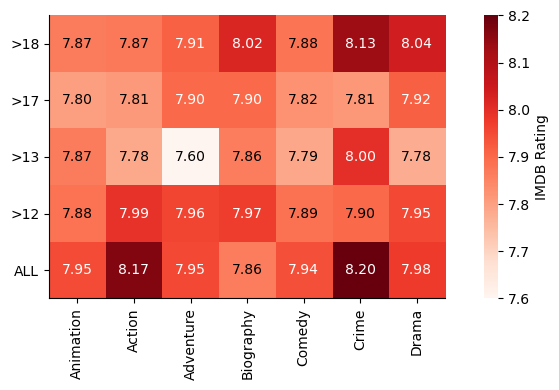

In [7]:
# mapa de color
fig, ax = plt.subplots(figsize=(8, 4))
text_colors = ("black" , "white" )
im = ax.imshow(ratings, cmap= "Reds" ) # mapa de calor
cbar = fig.colorbar(im, ax=ax, label= "IMDB Rating" ) # leyenda
cbar.outline.set_visible(False)

x = ratings.columns
y = ratings.index
# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
  for j in range(len(x)):
    value = ratings.iloc[i, j]
    text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
    ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()
ax.spines["right"].set_visible(False) # ocultar borde derecho
ax.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout()